In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/train.csv')
print(df.shape)
print(df.columns)



(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

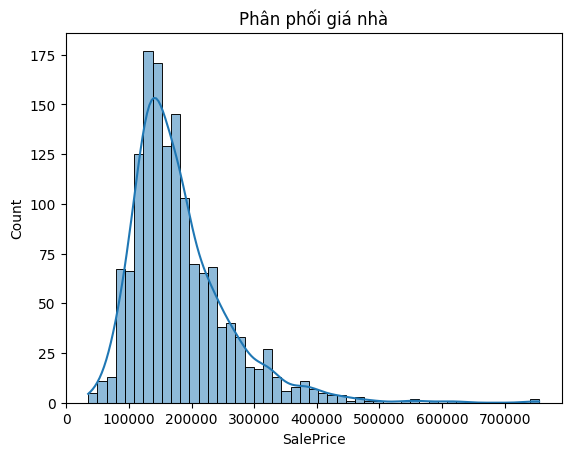

In [2]:
# Xem phân phối giá nhà
sns.histplot(df['SalePrice'], kde=True)
plt.title("Phân phối giá nhà")
plt.show()

In [3]:
# Kiểm tra thiếu dữ liệu
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False).head(10))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder
# Loại bỏ cột Id và xử lý các biến đầu vào
df.drop(columns=["Id"], inplace=True)

# Tách biến mục tiêu
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Xử lý biến phân loại đơn giản
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Điền missing value
X[categorical_cols] = X[categorical_cols].fillna("missing")
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# Label encoding cho biến phân loại
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

#Data test api

In [22]:
json.dumps(X.iloc[0].to_dict())  # Convert the first row of features to a dictionary for display

'{"MSSubClass": 60.0, "MSZoning": 3.0, "LotFrontage": 65.0, "LotArea": 8450.0, "Street": 1.0, "Alley": 2.0, "LotShape": 3.0, "LandContour": 3.0, "Utilities": 0.0, "LotConfig": 4.0, "LandSlope": 0.0, "Neighborhood": 5.0, "Condition1": 2.0, "Condition2": 2.0, "BldgType": 0.0, "HouseStyle": 5.0, "OverallQual": 7.0, "OverallCond": 5.0, "YearBuilt": 2003.0, "YearRemodAdd": 2003.0, "RoofStyle": 1.0, "RoofMatl": 1.0, "Exterior1st": 12.0, "Exterior2nd": 13.0, "MasVnrType": 1.0, "MasVnrArea": 196.0, "ExterQual": 2.0, "ExterCond": 4.0, "Foundation": 2.0, "BsmtQual": 2.0, "BsmtCond": 3.0, "BsmtExposure": 3.0, "BsmtFinType1": 2.0, "BsmtFinSF1": 706.0, "BsmtFinType2": 5.0, "BsmtFinSF2": 0.0, "BsmtUnfSF": 150.0, "TotalBsmtSF": 856.0, "Heating": 1.0, "HeatingQC": 0.0, "CentralAir": 1.0, "Electrical": 4.0, "1stFlrSF": 856.0, "2ndFlrSF": 854.0, "LowQualFinSF": 0.0, "GrLivArea": 1710.0, "BsmtFullBath": 1.0, "BsmtHalfBath": 0.0, "FullBath": 2.0, "HalfBath": 1.0, "BedroomAbvGr": 3.0, "KitchenAbvGr": 1.0, 

In [26]:
json.dumps(X.iloc[1].to_dict())  # Convert the first row of features to a dictionary for display

'{"MSSubClass": 20.0, "MSZoning": 3.0, "LotFrontage": 80.0, "LotArea": 9600.0, "Street": 1.0, "Alley": 2.0, "LotShape": 3.0, "LandContour": 3.0, "Utilities": 0.0, "LotConfig": 2.0, "LandSlope": 0.0, "Neighborhood": 24.0, "Condition1": 1.0, "Condition2": 2.0, "BldgType": 0.0, "HouseStyle": 2.0, "OverallQual": 6.0, "OverallCond": 8.0, "YearBuilt": 1976.0, "YearRemodAdd": 1976.0, "RoofStyle": 1.0, "RoofMatl": 1.0, "Exterior1st": 8.0, "Exterior2nd": 8.0, "MasVnrType": 3.0, "MasVnrArea": 0.0, "ExterQual": 3.0, "ExterCond": 4.0, "Foundation": 1.0, "BsmtQual": 2.0, "BsmtCond": 3.0, "BsmtExposure": 1.0, "BsmtFinType1": 0.0, "BsmtFinSF1": 978.0, "BsmtFinType2": 5.0, "BsmtFinSF2": 0.0, "BsmtUnfSF": 284.0, "TotalBsmtSF": 1262.0, "Heating": 1.0, "HeatingQC": 0.0, "CentralAir": 1.0, "Electrical": 4.0, "1stFlrSF": 1262.0, "2ndFlrSF": 0.0, "LowQualFinSF": 0.0, "GrLivArea": 1262.0, "BsmtFullBath": 0.0, "BsmtHalfBath": 1.0, "FullBath": 2.0, "HalfBath": 0.0, "BedroomAbvGr": 3.0, "KitchenAbvGr": 1.0, "Ki